In [1]:
# # Code to download file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# id = '1EnI1mSQcaCQWCkR8kJgRy7610EOyxv0n'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('data.csv')

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
data = data.dropna()
data_bt = data.drop(columns = ['Unnamed: 0'])
data = data.drop(columns = ['Unnamed: 0','datetime'] )
all_data = data.values
print(all_data)

[[1.42712000e+00 1.43089000e+00 1.42708000e+00 1.43012000e+00
  2.83600000e+03 1.00000000e+00]
 [1.43010000e+00 1.43964000e+00 1.42694000e+00 1.43948000e+00
  9.02000000e+03 1.00654490e+00]
 [1.43946000e+00 1.44334000e+00 1.43750000e+00 1.44218000e+00
  9.59300000e+03 1.00187568e+00]
 ...
 [1.19082000e+00 1.19405000e+00 1.19080000e+00 1.19341000e+00
  2.41070000e+04 1.00219180e+00]
 [1.19342000e+00 1.19660000e+00 1.19217000e+00 1.19442000e+00
  3.62210000e+04 1.00084631e+00]
 [1.19444000e+00 1.19503000e+00 1.19259000e+00 1.19362000e+00
  1.35860000e+04 9.99330219e-01]]


In [3]:
data_bt

,datetime,open,high,low,close,volume,ratio
0,2010-01-04T02:00:00.000000000Z,1.42712,1.43089,1.42708,1.43012,2836,1.000000
1,2010-01-04T06:00:00.000000000Z,1.43010,1.43964,1.42694,1.43948,9020,1.006545
2,2010-01-04T10:00:00.000000000Z,1.43946,1.44334,1.43750,1.44218,9593,1.001876
3,2010-01-04T14:00:00.000000000Z,1.44220,1.44560,1.44038,1.44152,10869,0.999542
4,2010-01-04T18:00:00.000000000Z,1.44150,1.44282,1.44041,1.44127,3719,0.999827
...,...,...,...,...,...,...,...
17334,2020-08-31T01:00:00.000000000Z,1.19082,1.19176,1.18969,1.19012,8670,0.999429
17335,2020-08-31T05:00:00.000000000Z,1.19011,1.19120,1.18841,1.19080,23629,1.000571
17336,2020-08-31T09:00:00.000000000Z,1.19082,1.19405,1.19080,1.19341,24107,1.002192
17337,2020-08-31T13:00:00.000000000Z,1.19342,1.19660,1.19217,1.19442,36221,1.000846


In [4]:
def maxminnorm(array):
    maxcols=array.max(axis=0)
    print(maxcols)
    mincols=array.min(axis=0)
    data_shape = array.shape
    data_rows = data_shape[0]
    data_cols = data_shape[1]
    t=np.empty((data_rows,data_cols))
    for i in range(data_cols):
        t[:,i]=(array[:,i]-mincols[i])/(maxcols[i]-mincols[i])
    return t

In [5]:
all_data = maxminnorm(all_data)

[1.49191000e+00 1.49402000e+00 1.48506000e+00 1.49189000e+00
 1.07306000e+05 1.02505449e+00]


In [6]:
from sklearn import preprocessing
all_data = preprocessing.scale(all_data)
#check mean=0, std=1
#all_data.mean(axis = 0)
#all_data.std(axis = 0)
all_data.shape

(17339, 6)

In [7]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components='mle',random_state=450175583) #auto select number of dimensions  
# pca.fit(all_data)                  
# all_data=pca.fit_transform(all_data)   
# print(all_data) 

In [8]:
def input_emb(original_data,seq):
    emb_list = []
    for i in range(0,len(original_data)-seq):
        temp = []
        for j in range(i,i+seq):
            temp.append(original_data[j])
        emb_list.append(temp)
    return emb_list

def label_emb(original_label,seq):
    emb_list = []
    for i in range(seq,len(original_label)):
        emb_list.append(original_label[i])
    return emb_list

In [9]:
def sp(data,co):
  a = int(len(data)*co)
  train = data[0:a]
  test = data[a+1:]
  return train,test

In [10]:
X_train,X_test = sp(all_data.tolist(),0.8)

In [11]:
y_data = data_bt['close'].values
date_time_list = data_bt['datetime'].values
open_list = data_bt['open'].values
high_list = data_bt['high'].values
low_list = data_bt['low'].values
y_train,y_test = sp(y_data.tolist(),0.8)

_,data_time = sp(date_time_list.tolist(),0.8)
_,open_data = sp(open_list.tolist(),0.8)
_,high_data = sp(high_list.tolist(),0.8)
_,low_data = sp(low_list.tolist(),0.8)

In [12]:
test=pd.DataFrame(data=X_test)
test['datetime'] = None
test['open'] = None
test['low'] = None
test['high'] = None
test['close'] = None
test.loc[:,'datetime'] = data_time
test.loc[:,'open'] = open_data
test.loc[:,'high'] = high_data
test.loc[:,'low'] = low_data
test.loc[:,'close'] = y_test
print(test)
test.to_csv('/content/for_backtesting_EUR_USD.csv')

             0         1         2  ...      low     high    close
0    -0.429849 -0.441592 -0.455608  ...  1.17590  1.18104  1.17642
1    -0.466529 -0.474940 -0.483342  ...  1.17270  1.17718  1.17482
2    -0.479678 -0.469497 -0.471555  ...  1.17406  1.17781  1.17726
3    -0.458829 -0.470015 -0.451014  ...  1.17643  1.17775  1.17690
4    -0.456667 -0.450577 -0.445207  ...  1.17710  1.18000  1.17980
...        ...       ...       ...  ...      ...      ...      ...
3462 -0.341609 -0.348980 -0.336089  ...  1.18969  1.19176  1.19012
3463 -0.347751 -0.353818 -0.347182  ...  1.18841  1.19120  1.19080
3464 -0.341609 -0.329196 -0.326468  ...  1.19080  1.19405  1.19341
3465 -0.319117 -0.307166 -0.314594  ...  1.19217  1.19660  1.19442
3466 -0.310293 -0.320729 -0.310954  ...  1.19259  1.19503  1.19362

[3467 rows x 11 columns]


In [13]:
np.array(X_train).shape

(13871, 6)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import torch.optim as optim
sequence = 7
input_emb_list_train = input_emb(X_train,sequence)
input_emb_list_val = input_emb(X_test,sequence)
label_emb_list_train = label_emb(y_train,sequence)
label_emb_list_val = label_emb(y_test,sequence)
input_batch_torch = torch.from_numpy(np.array(input_emb_list_train)).float()
target_batch_torch = torch.from_numpy(np.array(label_emb_list_train)).view(-1).float()
val_input = torch.from_numpy(np.array(input_emb_list_val)).float()

val_target =torch.from_numpy(np.array(label_emb_list_val)).view(-1).float()
print(target_batch_torch.numpy().shape)
type(input_batch_torch)

(13864,)


torch.Tensor

In [15]:
n_input = 6
n_hidden = 50
n_class = 1
total_epoch = 500
learning_rate = 0.005

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import torch.optim as optim
class MAPE(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        sub_t = torch.sub(y, x)
        re = torch.abs(torch.div(sub_t,y))
        
       
        return torch.mean(re)
    
class Correlation(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        mean_x = torch.mean(x)
        mean_y = torch.mean(y)
        
        sub_x = x-mean_x
        sub_y = y-mean_y
        
        sum_mul = torch.sum(torch.mul(sub_x,sub_y))
        
        pow_x = sub_x.pow(2)
        pow_y = sub_y.pow(2)
        
        sum_pow = torch.mul(torch.sum(pow_x),torch.sum(pow_y))
        sqrt_re = sum_pow.sqrt()
        
        return sum_mul/sqrt_re

class Theil_U(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        sub_t = torch.sub(x,y)
        mean_error = torch.mean(sub_t.pow(2)).sqrt()
        mean_squar_x = torch.mean(x.pow(2)).sqrt()
        mean_squar_y = torch.mean(y.pow(2)).sqrt()
        re = mean_error/(mean_squar_x+mean_squar_y)
       
        return re
        
class LSTM_Attention(nn.Module):

    def __init__(self):

        super(LSTM_Attention, self).__init__()
        self.lstm = nn.LSTM(n_input, n_hidden, batch_first =True, dropout=0.5)
        self.linear = nn.Linear(n_hidden, n_class)

        self.w_omega = nn.Parameter(torch.Tensor(n_hidden, n_hidden))
        self.u_omega = nn.Parameter(torch.Tensor(n_hidden, 1))
        
        nn.init.uniform_(self.w_omega, -0.1, 0.1)
        nn.init.uniform_(self.u_omega, -0.1, 0.1)

    def attention_net(self,x):
      u = torch.tanh(torch.matmul(x, self.w_omega))  
      att = torch.matmul(u, self.u_omega)
      att_score = F.softmax(att, dim=1) 
      scored_x = x * att_score
      context = torch.sum(scored_x, dim=1)
      return context

    def forward(self, x):
        #h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n,c_n) = self.lstm(x)
        
        attn_output = self.attention_net(lstm_out) 
        z = self.linear(attn_output)
        return z.view(-1)
    
    # Loss function and optimizer
net_lstm = LSTM_Attention()
criterion = nn.MSELoss()
optimizer = optim.Adam(net_lstm.parameters(), lr=learning_rate)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
loss_list_train = []
loss_list_test = []

mape_list_train =[]
mape_list_test =[]

correlation_list_train = []
correlation_list_test = []

Theil_U_list_train =[]
Theil_U_list_test =[]

mape = MAPE()
cor = Correlation()
Theil = Theil_U()
for epoch in range(total_epoch):  
    
    # Set the flag to training
    net_lstm.train()
    
    # forward + backward + optimize
    outputs= net_lstm(input_batch_torch) 
    loss = criterion(outputs, target_batch_torch).sqrt()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Set the flag to evaluation, which will 'turn off' the dropout
    net_lstm.eval()
    output_train = net_lstm(input_batch_torch) 
    output_test = net_lstm(val_input)
    
    # Evaluation loss and accuracy calculation
    loss_train = criterion(output_train, target_batch_torch).sqrt()
    loss_test = criterion(output_test,val_target).sqrt()
    loss_list_train.append(loss_train.item())
    loss_list_test.append(loss_test.item())

    loss_mape_train =mape(output_train, target_batch_torch)
    loss_mape_test =mape(output_test,val_target)
    mape_list_train.append(loss_mape_train.item())
    mape_list_test.append(loss_mape_test.item())

    loss_cor_train = cor(output_train, target_batch_torch)
    loss_cor_test = cor(output_test,val_target)
    correlation_list_train.append(loss_cor_train.item())
    correlation_list_test.append(loss_cor_test.item())

    loss_theil_train = Theil(output_train, target_batch_torch) 
    loss_theil_test = Theil(output_test,val_target)
    Theil_U_list_train.append(loss_theil_train.item())
    Theil_U_list_test.append(loss_theil_test.item())
    
    #acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f' %(epoch + 1, loss_train.item()))

print('Finished Training')


Epoch: 1, loss: 1.21940
Epoch: 2, loss: 1.16291
Epoch: 3, loss: 1.10494
Epoch: 4, loss: 1.04233
Epoch: 5, loss: 0.97188
Epoch: 6, loss: 0.89060
Epoch: 7, loss: 0.79671
Epoch: 8, loss: 0.69193
Epoch: 9, loss: 0.58606
Epoch: 10, loss: 0.50061
Epoch: 11, loss: 0.44203
Epoch: 12, loss: 0.36895
Epoch: 13, loss: 0.28894
Epoch: 14, loss: 0.22992
Epoch: 15, loss: 0.17149
Epoch: 16, loss: 0.14979
Epoch: 17, loss: 0.17902
Epoch: 18, loss: 0.19974
Epoch: 19, loss: 0.19499
Epoch: 20, loss: 0.16677
Epoch: 21, loss: 0.11948
Epoch: 22, loss: 0.06237
Epoch: 23, loss: 0.05889
Epoch: 24, loss: 0.09902
Epoch: 25, loss: 0.11315
Epoch: 26, loss: 0.09972
Epoch: 27, loss: 0.06644
Epoch: 28, loss: 0.03481
Epoch: 29, loss: 0.04879
Epoch: 30, loss: 0.06343
Epoch: 31, loss: 0.06281
Epoch: 32, loss: 0.05312
Epoch: 33, loss: 0.04568
Epoch: 34, loss: 0.04213
Epoch: 35, loss: 0.03261
Epoch: 36, loss: 0.02449
Epoch: 37, loss: 0.03673
Epoch: 38, loss: 0.04239
Epoch: 39, loss: 0.03310
Epoch: 40, loss: 0.01364
Epoch: 41

In [16]:
train_after_train=net_lstm(input_batch_torch).detach().numpy()
test_after_train =net_lstm(val_input).detach().numpy()

NameError: ignored

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
net = torch.load('lstm+attention.pt')
output_test = net(val_input)
    


In [20]:
from sklearn.metrics import mean_squared_error
output_test = output_test.detach().numpy()
val_target = val_target.numpy()
rmse = mean_squared_error(output_test,val_target)**(0.5)
rmse

0.006757105777199007

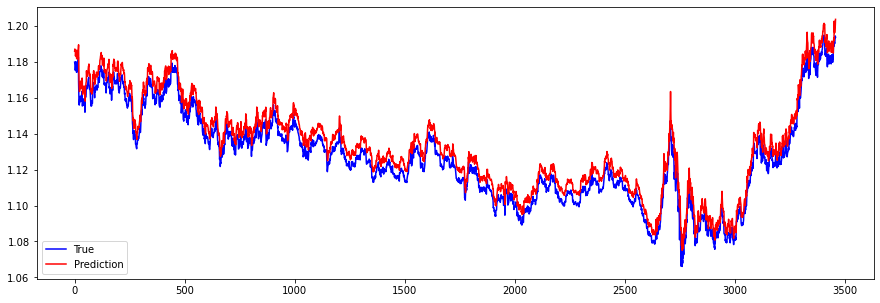

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(label_emb_list_val,'blue',label='True')
plt.plot(test_after_train,'red',label='Prediction')
plt.legend()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,5))
# plt.plot(label_emb_list_val,'blue',label='True')
# plt.plot(ot,'red',label='Prediction')
# plt.legend()
# plt.show()

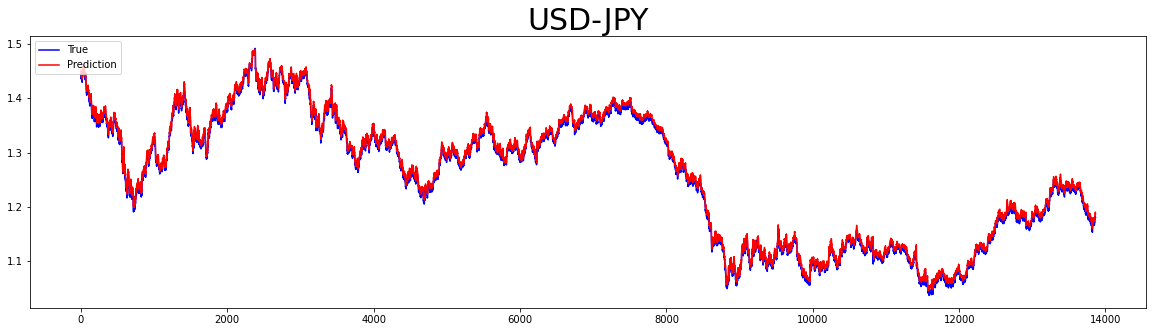

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(target_batch_torch,'blue',label='True')
plt.plot(train_after_train,'red',label='Prediction')

plt.title('USD-JPY',fontsize=  '30')
plt.legend(loc="upper left")

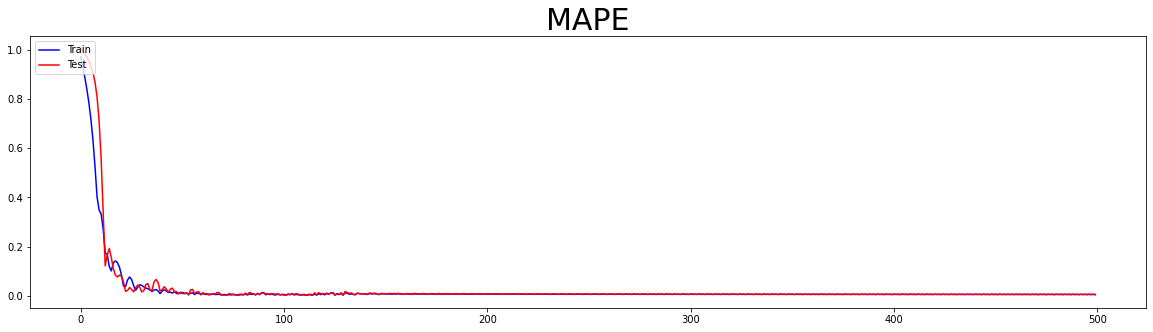

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(mape_list_train,'blue',label='Train')
plt.plot(mape_list_test,'red',label='Test')

plt.title('MAPE',fontsize=  '30')
plt.legend(loc="upper left")

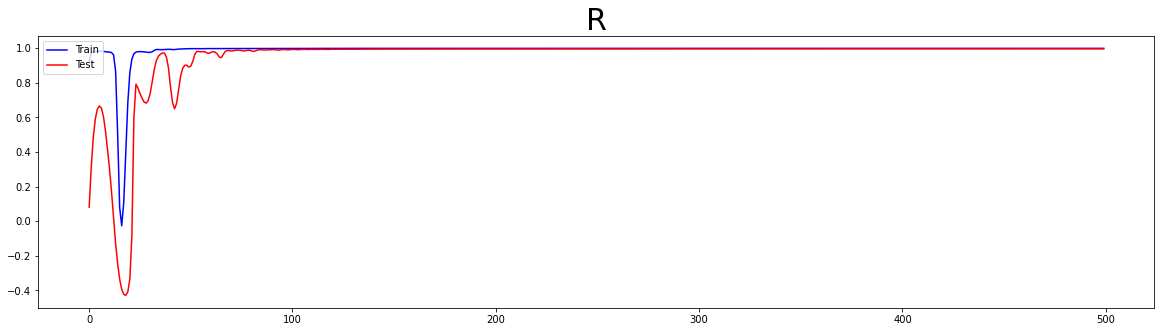

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(correlation_list_train,'blue',label='Train')
plt.plot(correlation_list_test,'red',label='Test')

plt.title('R',fontsize=  '30')
plt.legend(loc="upper left")

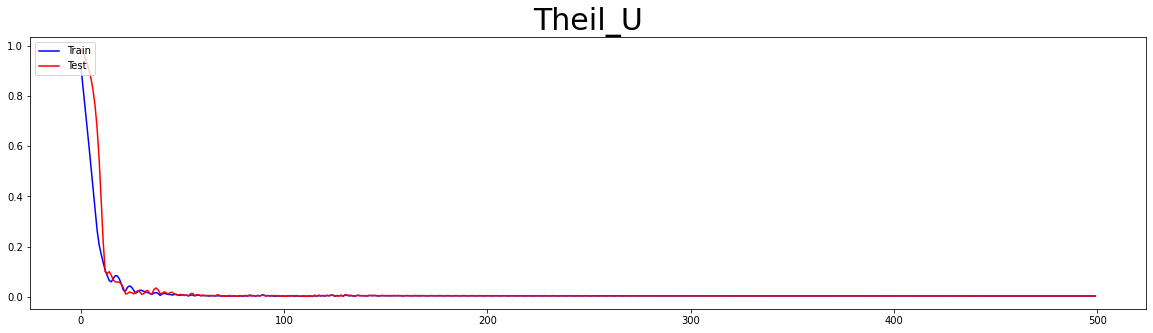

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Theil_U_list_train,'blue',label='Train')
plt.plot(Theil_U_list_test,'red',label='Test')

plt.title('Theil_U',fontsize=  '30')
plt.legend(loc="upper left")

In [ ]:
print('Mape:%.5f, R:%.5f, Theil_U:%.5f'%(mape_list_test[-1],correlation_list_test[-1],Theil_U_list_test[-1]))

Mape:0.00569, R:0.99671, Theil_U:0.00299


In [ ]:
torch.save(net_lstm,'lstm+attention.pt')



In [ ]:
name=['close']
test=pd.DataFrame(columns=name,data=test_after_train)
print(test)
test.to_csv('./backtesting_attention_EUR_USD.csv',encoding='gbk')

         close
0     1.185925
1     1.187143
2     1.186451
3     1.186463
4     1.183233
...        ...
3455  1.196234
3456  1.196416
3457  1.198231
3458  1.200407
3459  1.203660

[3460 rows x 1 columns]


In [ ]:
print(mape_list_test.index(min(mape_list_test)))
print(Theil_U_list_test.index(min(Theil_U_list_test)))
print(correlation_list_test.index(max(correlation_list_test)))

129
129
498
